In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Sprite utils

In [2]:
import sys
sys.path.append("../")

import westworld
from westworld.assets.sprites.utils import *
from westworld.assets import make_arrow
from westworld.colors import *
from westworld.environment import GridEnvironment
from westworld.agents.sir_agent import SIRAgent
from westworld.environment.spatial import SpatialEnvironment
from westworld.agents import BaseGridAgent
from westworld.agents.collectible_finder import CollectibleFinderAgent
from westworld.objects import BaseObstacle,BaseTrigger,BaseCollectible,BaseRectangle
from westworld.simulation import Simulation
from westworld.colors import *
from westworld.logger import Logger

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


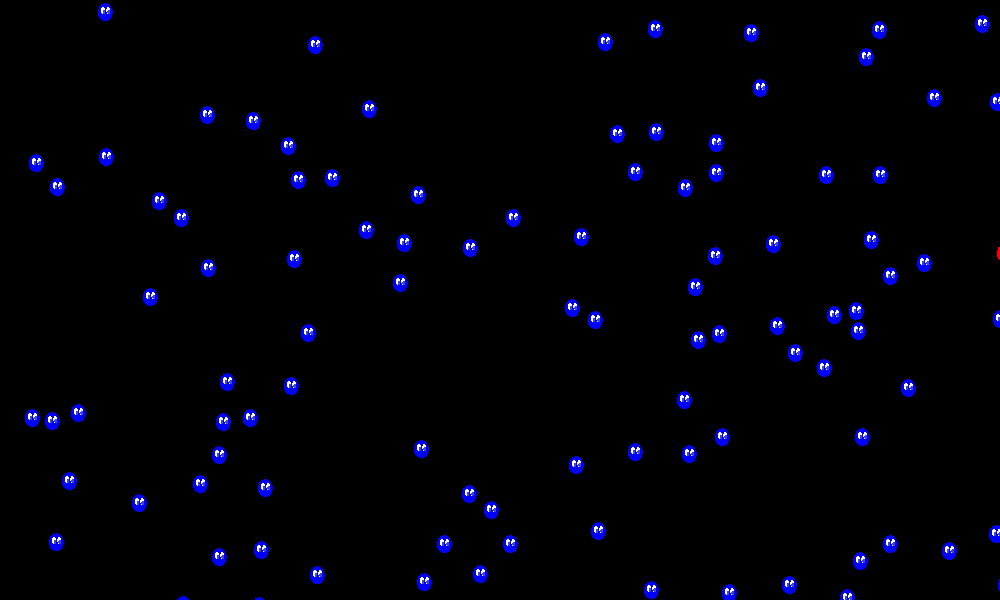

In [15]:

class Agent(SIRAgent):
    
    @property
    def blocking(self):
        return True
    
#     def step(self):
        
        
    
#     def step(self):
        
#         if self.state == "S":
            
#             n_infected = len(self.find_in_range({"state":"I"}))
            
#             if n_infected > 0:
#                 proba_infection = norm.cdf(n_infected,loc = self.contact_risk,scale = 3)

#                 if random.random() < proba_infection:

#                     self.set_state("I")
#                     self.infected_date = self.clock
                
                
#         elif self.state == "I":
            
#             if self.clock - self.infected_date >= self.recovery_duration:
#                 self.set_state("R")
            
# #         self.wander()
        
        
        
# #         self.wander()
#         self.move(speed = self.speed)
#         self.turn(5)
        
#         self.wander()
    
#         self.move(speed = 10,angle = 45)

CONTACT_RISK = 6
RECOVERY_DURATION_RANGE = [50,150]

obstacle = BaseObstacle(300,300,200,200,color = RED)

# agent = lambda x,y : Agent(x,y,width = 5,height = 5,circle = True,speed = 5)
spawner = lambda state : lambda x,y : Agent(x,y,
                                            width = 20,
                                            height = 20,
                                            state = state,
                                            contact_risk = CONTACT_RISK,
                                            recovery_duration_range = RECOVERY_DURATION_RANGE)


WIDTH = 1000
HEIGHT = 600
env = SpatialEnvironment(width = WIDTH,height = HEIGHT)#,objects = [obstacle])
env.spawn(spawner("I"),1,allow_overlap = True)
env.spawn(spawner("S"),100,allow_overlap = False)

env.render()
env.get_img()

In [16]:
sim = Simulation(env,fps = 25)
sim.run_episode(n_steps = 300,save = False,replay=True,fps_replay = 25)

interactive(children=(Play(value=0, description='Press play', interval=40, max=300), Output()), _dom_classes=(…

IntSlider(value=0, max=300)